<a href="https://colab.research.google.com/github/DonRoboto/AprendizajeAutomatizado/blob/master/Tarea3/Tarea3_ej1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias necesarias

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Función para evaluar cada modelo en entrenamiento (80%) y validación (20%)

In [0]:
def fit_eval(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []

    m = len(X_train)
    model.fit(X_train[:m], y_train[:m])
    
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

    err_train = np.sqrt(train_errors).mean()
    err_test = np.sqrt(test_errors).mean() 
    return  err_train, err_test


Cargar datos de precios de casas en Boston

In [0]:
url_data = 'https://raw.githubusercontent.com/DonRoboto/AprendizajeAutomatizado/master/Tarea3/housing.data'
data = pd.read_csv(url_data,header=None, delimiter=r"\s+")
df = data.to_numpy()

X = df[:,0:13]
y = df[:,13]

err_train = []
err_test = []

Se evalua el modelo con diferentes grados de expansión polinomial

In [6]:
grado = 30
for i in range(1, grado+1):
    polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=grado, interaction_only=True, include_bias=False)),
            ("lin_reg", LinearRegression()),
            ])

    et, ev = fit_eval(polynomial_regression, X, y)
    err_train.append(et)
    err_test.append(ev)
    print("Grado del Polinomio {} Error de Entrenamiento {}".format(i, et))
    print("Grado del Polinomio {} Error de Validación {}".format(i, ev))

Grado del Polinomio 1 Error de Entrenamiento 4.342787390361315e-06
Grado del Polinomio 1 Error de Validación 346.6003537329771
Grado del Polinomio 2 Error de Entrenamiento 1.1676898108879046e-05
Grado del Polinomio 2 Error de Validación 268.8991834440288
Grado del Polinomio 3 Error de Entrenamiento 1.647072569578795e-08
Grado del Polinomio 3 Error de Validación 2534.437429025663
Grado del Polinomio 4 Error de Entrenamiento 1.1428175467472656e-05
Grado del Polinomio 4 Error de Validación 466.84404511121704
Grado del Polinomio 5 Error de Entrenamiento 5.182260472445401e-09
Grado del Polinomio 5 Error de Validación 225.1643284573125
Grado del Polinomio 6 Error de Entrenamiento 1.542680203051754e-08
Grado del Polinomio 6 Error de Validación 804.213491335488
Grado del Polinomio 7 Error de Entrenamiento 3.5714229667334175e-08
Grado del Polinomio 7 Error de Validación 628.6982275318155
Grado del Polinomio 8 Error de Entrenamiento 1.0801856503892661e-08
Grado del Polinomio 8 Error de Validació

Se grafican los niveles de error en entrenamiento y validacion para diferentes grados de expansión polinomial

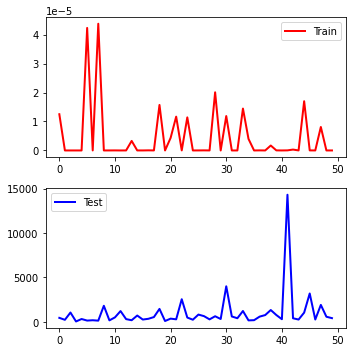

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
axes[0].plot(err_train, "r", linewidth=2, label="Train")
axes[0].legend(loc="best")

axes[1].plot(err_test, "b", linewidth=2, label="Test")
axes[1].legend(loc="best")
fig.tight_layout()